## Bear Character Image Dataset
### 곰 캐릭터 이미지 분류

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')

# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 244

# 이미지 전처리 객체 선언
idg = ImageDataGenerator()

# 경로 지정
original_dir = './datasets/original/'
# 경로를 통해 이미지 불러온 후 이미지 전처리 진행
original_generator = idg.flow_from_directory(original_dir,
                                             target_size=(IMAGE_SIZE, IMAGE_SIZE), 
                                             batch_size=BATCH_SIZE,
                                             class_mode='categorical', 
                                             shuffle=True)

# 각 클랙스의 이름과 인덱스 출력
print(original_generator.class_indices)

Found 600 images belonging to 3 classes.
{'Bellygom': 0, 'brokenbear': 1, 'jokebear': 2}


In [3]:
# 각 타겟의 타겟 이름을 담기 위해 key와 value의 순서 변경하여 타겟의 고유값을 저장
target_name = {v: k for k, v in original_generator.class_indices.items()}
target_name

{0: 'Bellygom', 1: 'brokenbear', 2: 'jokebear'}

In [4]:
# 각 타겟의 이름 담을 초기 list 선언
original_target_names = []

# 각 타겟의 인덱스를 확인하여 인덱스에 맞는 타겟 이름을 담아주기
for target in original_generator.classes:
    original_target_names.append(target_name[target])

# 각 타겟의 개수 확인
print(original_target_names.__len__())

600


In [5]:
import pandas as pd

# 파일 경로와 타겟값을 가지고 새로운 데이터 프레임 생성 후
# 경로 중 \\(역슬래시)로 되어 있는 부분을 /(슬래시)로 변경
original_df = pd.DataFrame({'file_paths': original_generator.filepaths, 'target_names': original_target_names, 'targets': original_generator.classes})
original_df.file_paths = original_df.file_paths.apply(lambda file_path: file_path.replace('\\', '/'))

display(original_df)

file_paths target_names  targets
0      ./datasets/original/Bellygom/Bellygom1.png     Bellygom        0
1     ./datasets/original/Bellygom/Bellygom10.png     Bellygom        0
2    ./datasets/original/Bellygom/Bellygom100.png     Bellygom        0
3    ./datasets/original/Bellygom/Bellygom101.png     Bellygom        0
4    ./datasets/original/Bellygom/Bellygom102.png     Bellygom        0
..                                            ...          ...      ...
595   ./datasets/original/jokebear/jokebear95.png     jokebear        2
596   ./datasets/original/jokebear/jokebear96.png     jokebear        2
597   ./datasets/original/jokebear/jokebear97.png     jokebear        2
598   ./datasets/original/jokebear/jokebear98.png     jokebear        2
599   ./datasets/original/jokebear/jokebear99.png     jokebear        2

[600 rows x 3 columns]

In [6]:
from sklearn.model_selection import train_test_split

# 검증용 데이터 세트 분리
train_images, test_images, train_targets, test_targets = \
train_test_split(original_df.file_paths, 
                 original_df.targets, 
                 stratify=original_df.targets, 
                 test_size=0.2, random_state=124)

In [7]:
from sklearn.model_selection import train_test_split

# 검증용 데이터 세트 분리
train_images, validation_images, train_targets, validation_targets = \
train_test_split(train_images, 
                 train_targets, 
                 stratify=train_targets, 
                 test_size=0.2, random_state=124)

# 타겟 비중 확인
print(train_targets.value_counts())
print(validation_targets.value_counts())
print(test_targets.value_counts())

targets
1    128
0    128
2    128
Name: count, dtype: int64
targets
2    32
1    32
0    32
Name: count, dtype: int64
targets
0    40
1    40
2    40
Name: count, dtype: int64


In [8]:
# import shutil
# import os.path

# # 데이터 세트 경로 지정
# base_dir = './datasets/'

# for filepath in train_images:
#     # 이미지 파일을 복사할 디렉터리의 경로 저장
#     destination = base_dir + 'train/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]

#     # 디렉터리가 없는 경우 해당 디렉터리를 생성
#     if not os.path.exists(destination):
#         os.makedirs(destination)

#     # 이미지 파일을 디렉터리로 복사
#     shutil.copy2(filepath, destination)

In [9]:
# import shutil
# import os.path

# # 데이터 세트 경로 지정
# base_dir = './datasets/'

# for filepath in validation_images:
#     # 이미지 파일을 복사할 디렉터리의 경로 저장
#     destination = base_dir + 'validation/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]

#     # 디렉터리가 없는 경우 해당 디렉터리를 생성
#     if not os.path.exists(destination):
#         os.makedirs(destination)

#     # 이미지 파일을 디렉터리로 복사
#     shutil.copy2(filepath, destination)

In [10]:
# import shutil
# import os.path

# # 데이터 세트 경로 지정
# base_dir = './datasets/'

# for filepath in test_images:
#     # 이미지 파일을 복사할 디렉터리의 경로 저장
#     destination = base_dir + 'test/' + filepath[len(base_dir + '/original'):filepath.rindex('/')]

#     # 디렉터리가 없는 경우 해당 디렉터리를 생성
#     if not os.path.exists(destination):
#         os.makedirs(destination)

#     # 이미지 파일을 디렉터리로 복사
#     shutil.copy2(filepath, destination)

In [11]:
# 인덱스 번호를 대조하여 각 데이터 프레임 나누기
train_df = original_df.loc[train_images.index].reset_index(drop=True)
validation_df = original_df.loc[validation_images.index].reset_index(drop=True)
test_df = original_df.loc[test_images.index].reset_index(drop=True)

print(train_df.shape[0])
print(validation_df.shape[0])
print(test_df.shape[0])

384
96
120


In [12]:
# 타겟 데이터 비중 확인
train_target = train_df.target_names.value_counts().reset_index()
validation_target = validation_df.target_names.value_counts().reset_index()
test_target = test_df.target_names.value_counts().reset_index()

In [13]:
display(train_target)
display(validation_target)
display(test_target)

target_names  count
0   brokenbear    128
1     Bellygom    128
2     jokebear    128

target_names  count
0     jokebear     32
1   brokenbear     32
2     Bellygom     32

target_names  count
0     Bellygom     40
1   brokenbear     40
2     jokebear     40

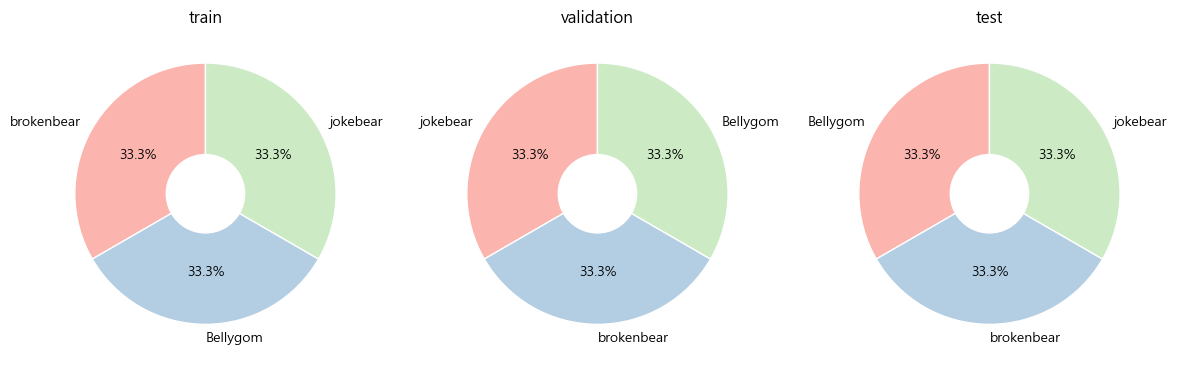

In [14]:
# 타겟 데이터 비중 변경 전/후 차이 그래프 확인
fig, axes = plt.subplots(1, 3, figsize=(12,5))

# 부채꼴 스타일
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')
# 컬러맵의 색상 선택
outer_colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6]))

train_counts = train_target['count']
train_labels = train_target['target_names']
val_counts = validation_target['count']
val_labels = validation_target['target_names']
test_counts = test_target['count']
test_labels = test_target['target_names']

# 그래프 그리기
axes[0].pie(train_counts, labels=train_labels, colors=outer_colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
axes[0].set_title('train')
axes[1].pie(val_counts, labels=val_labels, colors=outer_colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
axes[1].set_title('validation')
axes[2].pie(test_counts, labels=test_labels, colors=outer_colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
axes[2].set_title('test')

plt.tight_layout()
plt.show()

In [15]:
print(train_df.shape)
print(validation_df.shape)
print(test_df.shape)

(384, 3)
(96, 3)
(120, 3)


In [16]:
from glob import glob
import os

# 경로 지정
train_dir = './datasets/train/'
validation_dir = './datasets/validation/'
test_dir = './datasets/test/'

# 해당 경로를 통해 이미지 폴더를 찾아옴
directories = glob(os.path.join(train_dir, '*'))

In [17]:
# 폴더 이름 저장할 초기 list 생성
directory_names = []

for directory in directories:
    # 디렉토리의 이름을 찾아와서 list에 저장
    directory_names.append(directory[directory.rindex('\\') + 1:])

print(directory_names)

['Bellygom', 'brokenbear', 'jokebear']


### 📊 유사도 예측

In [18]:
import numpy as np
from tensorflow.keras.utils import Sequence
from sklearn.utils import shuffle
import cv2

# 데이터 세트 생성 class 정의
class Dataset(Sequence):
    # 클래스의 초기화
    # 경로, 타겟, 배치 크기, albumentations 객체, 전처리 하마, 셔플 여부를 인자로 받음
    def __init__(self, file_paths, targets, batch_size=BATCH_SIZE, aug=None, preprocess=None, shuffle=False):
        self.file_paths = file_paths
        self.targets = targets
        self.batch_size = batch_size
        self.aug = aug
        self.preprocess = preprocess
        self.shuffle = shuffle

        # shuffle True 시 진행:
        if self.shuffle:
            # epoch 끝날 때마다 호출
            self.on_epoch_end()

    # 전체 데이터 세트 크기 반환
    def __len__(self):
        # 하나의 배치 사이즈에 필요한 데이터 개수 리턴
        return int(np.ceil(len(self.targets) / self.batch_size))

    # 주어진 인덱스에 해당하는 배치 반환
    def __getitem__(self, index):
        # 파일 경로와 타겟 데이터를 배치 크기만큼 자르고, 이미지를 불러와 처리한 후 배치로 반환
        file_paths_batch = self.file_paths[index * self.batch_size: (index + 1) * self.batch_size]
        targets_batch = self.targets[index * self.batch_size: (index + 1) * self.batch_size]

        # 데이터 배치 저장
        results_batch = np.zeros((file_paths_batch.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

        # 데이터 수만큼 반복
        for i in range(file_paths_batch.shape[0]):
            # RGB로 색상 형식을 변환하여 이미지 가져오기
            image = cv2.cvtColor(cv2.imread(file_paths_batch[i]), cv2.COLOR_BGR2RGB)
            # 이미지 크기 조정
            image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))

            # albumentations이 있다면:
            if self.aug is not None:
                # Augmentor 객체로 이미지 변환
                image = self.aug(image=image)['image']

            # 전처리 함수가 있다면:
            if self.preprocess is not None:
                # 이미지 전처리 진행
                image = self.preprocess(image)

            # 결과 배치에 이미지를 저장
            results_batch[i] = image

        # 결과 배치와 타겟 배치를 반환
        return results_batch, targets_batch
        
    def on_epoch_end(self):
        # shuffle 옵션이 켜져있다면, 데이터를 섞기
        if self.shuffle:
            # epoch 끝날 때마다 데이터 섞기
            self.file_paths, self.targets = shuffle(self.file_paths, self.targets)

In [19]:
def create_dataset(paths, targets, BATCH_SIZE, shuffle=True):   
    return Dataset(paths,
                   targets,
                   batch_size=BATCH_SIZE,
                   shuffle=True)

In [20]:
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(3, 3))
    plt.imshow(image)
    plt.axis('off')

In [21]:
import matplotlib.pyplot as plt

def show_images(files_batch, ncols=4, title=None):    
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    
    for i in range(ncols):
        # files_batch는 float이므로 int로 변경
        axs[i].imshow(np.array(files_batch[i], dtype='int32'))
        axs[i].axis('off')
        axs[i].set_title(title[i]) 

In [22]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions as vgg16_decode_predictions
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions as resnet50v2_decode_predictions
from tensorflow.keras.applications.xception import Xception, decode_predictions as xception_decode_predictions
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, decode_predictions as mobilenetv2_decode_predictions

def predict_and_display(images, titles, model_name):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=len(images))

    # VGG16 모델 선택
    if model_name == 'vgg16':
        model = VGG16()
        decode_predictions = vgg16_decode_predictions
        target_size = (224, 224)
    # ResNet50V2 모델 선택
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2()
        decode_predictions = resnet50v2_decode_predictions
        target_size = (224, 224)
    # Xception 모델 선택
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception()
        decode_predictions = xception_decode_predictions
        target_size = (299, 299)
    # MobileNetV2 모델 선택
    elif model_name == 'mobilenet':
        model = MobileNetV2()
        decode_predictions = mobilenetv2_decode_predictions
        target_size = (224, 224)

    for i, image in enumerate(images):
        # 모델 입력 크기에 맞게 이미지 크기 조정
        resized_image = cv2.resize(image, target_size)
        # 이미지 배열로 변환
        image_array = img_to_array(resized_image)
        # 차원 확장 (배열의 첫 번째 차원 확장)
        image_array = np.expand_dims(image_array, axis=0)
        # 이미지 예측
        prediction = model.predict(image_array)
        # 이미지 분류 모델의 예측 결과를 해석
        target = decode_predictions(prediction)
        # 높은 확률로 예측 된 클래스 이름과 확률
        predicted_class = target[0][0][1]
        predicted_probability = np.round(target[0][0][2] * 100, 2)
        
        # 이미지와 예측 결과 표시
        axs[i].imshow(image.astype('int'))
        axs[i].axis('off')
        axs[i].set_title(f"{predicted_class}\n{predicted_probability}%")

        print(target)

In [23]:
import albumentations as A

# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 244

# 각 클래스에서 하나씩 이미지를 샘플링하여 균등한 배치 구성
sampled_df = test_df.groupby('targets', group_keys=False).apply(lambda x: x.sample(1))

# 데이터 경로 및 타겟 담기 (get_dummies를 통해 원-핫 인코딩 진행)
sampled_file_paths = sampled_df['file_paths'].values
sampled_targets = pd.get_dummies(sampled_df['targets']).values # CategoricalCrossEntropy

# 이미지 변환 (증강)
aug = A.Compose([
    # 크기 조정 및 회전
    A.ShiftScaleRotate(p=0.5),
    # 센터 크롭
    A.CenterCrop(height=100, width=200, p=0.5),
    # 밝기 및 대비 변경
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)

In [24]:
# datasets 객체에서 배치 이미지를 불러온 후 각 변수에 저장
# iter: 반복 가능한 객체를 이터레이터(값을 순차적으로 반환하는 객체)로 변환
# next: 이터레이터 객체에서 값을 하나씩 가져오고 가져올 값이 없다면 StopIteration 예외 발생 
files_batch, targets_batch = next(iter(dataset))
# 레이블 인코딩시, target 차원을 2차원으로 맞춰줘야 한다.
print(files_batch.shape, targets_batch.shape)

(3, 244, 244, 3) (3, 3)


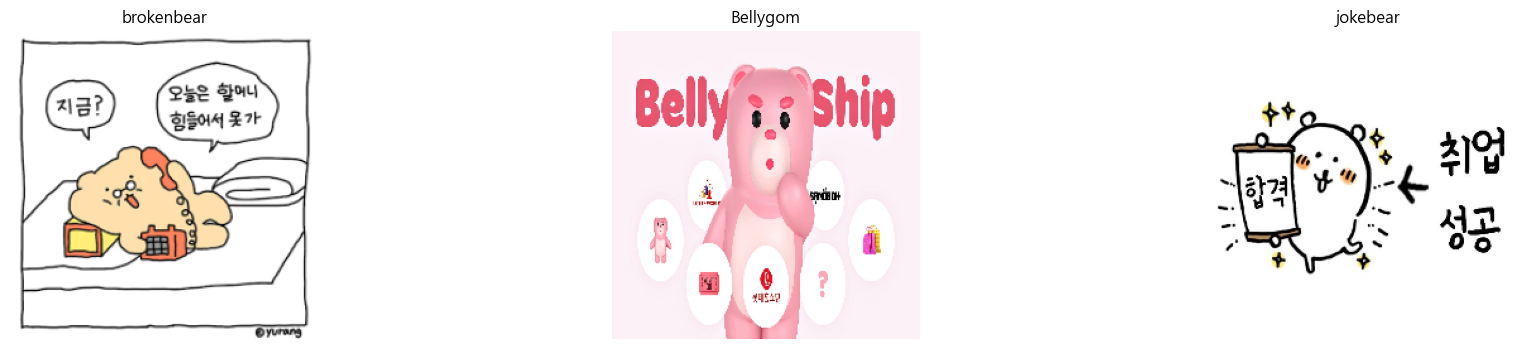

In [25]:
# # 타겟 비중
# print(test_df.groupby(by=['target_names', 'targets']).count())

# 이미지 제목 생성
titles = [target_name[np.argmax(target)] for target in targets_batch]

# 정답 출력
show_images(files_batch, ncols=3, title=titles)

vgg16
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n03291819', 'envelope', 0.14984778), ('n03109150', 'corkscrew', 0.030457983), ('n02840245', 'binder', 0.02920909), ('n04153751', 'screw', 0.023942273), ('n03476684', 'hair_slide', 0.023513818)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step
[[('n03291819', 'envelope', 0.83387923), ('n03595614', 'jersey', 0.07287856), ('n02840245', 'binder', 0.031708203), ('n06596364', 'comic_book', 0.007395746), ('n06359193', 'web_site', 0.0072298)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step
[[('n04074963', 'remote_control', 0.28238082), ('n03929660', 'pick', 0.21340322), ('n04254120', 'soap_dispenser', 0.11453117), ('n03825788', 'nipple', 0.09299809), ('n04447861', 'toilet_seat', 0.062633835)]]


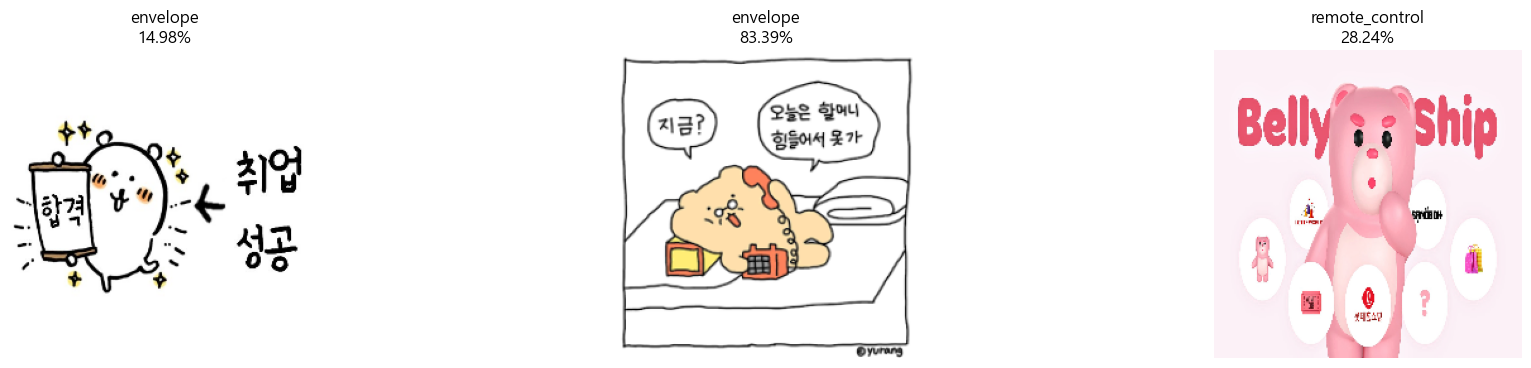

In [26]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

# 예측 모델 출력
print('vgg16')
predict_and_display(files_batch, titles, 'vgg16')

resnet50
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
[[('n02089973', 'English_foxhound', 1.0), ('n02123597', 'Siamese_cat', 1.539665e-14), ('n07613480', 'trifle', 7.162194e-20), ('n15075141', 'toilet_tissue', 0.0), ('n02319095', 'sea_urchin', 0.0)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step
[[('n02123597', 'Siamese_cat', 0.95852566), ('n02089973', 'English_foxhound', 0.04147441), ('n07613480', 'trifle', 1.1538355e-17), ('n01855032', 'red-breasted_merganser', 1.1235576e-23), ('n15075141', 'toilet_tissue', 0.0)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 691ms/step
[[('n07613480', 'trifle', 1.0), ('n02089973', 'English_foxhound', 2.5054845e-26), ('n15075141', 'toilet_tissue', 0.0), ('n02317335', 'starfish', 0.0), ('n02389026', 'sorrel', 0.0)]]


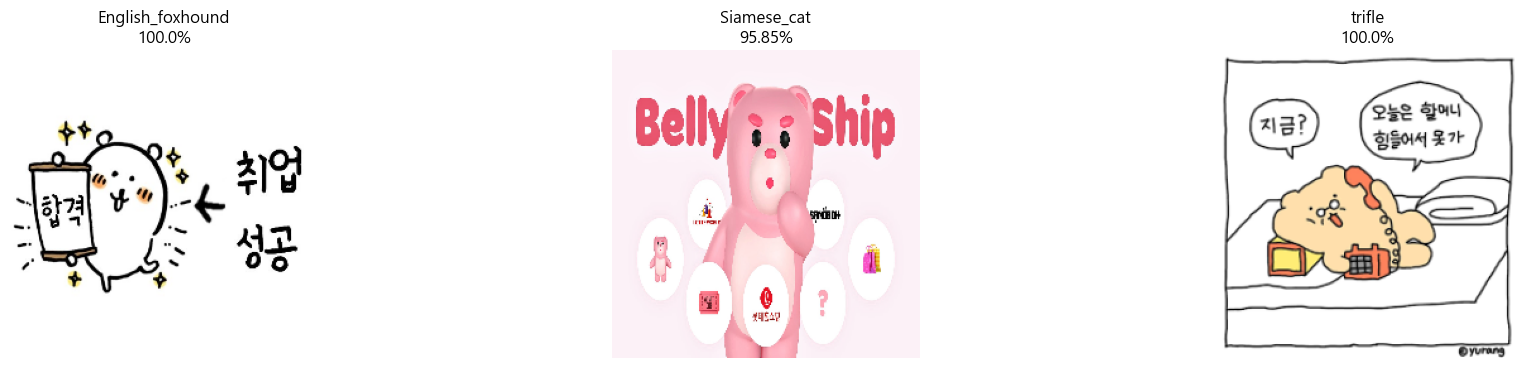

In [27]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

print('resnet50')
predict_and_display(files_batch, titles, 'resnet50')

xception
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
[[('n04127249', 'safety_pin', 1.0), ('n03775546', 'mixing_bowl', 2.8577275e-21), ('n15075141', 'toilet_tissue', 0.0), ('n02395406', 'hog', 0.0), ('n02389026', 'sorrel', 0.0)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n04127249', 'safety_pin', 1.0), ('n03775546', 'mixing_bowl', 2.1610667e-10), ('n15075141', 'toilet_tissue', 0.0), ('n02395406', 'hog', 0.0), ('n02389026', 'sorrel', 0.0)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[('n02319095', 'sea_urchin', 1.0), ('n04149813', 'scoreboard', 1.0285954e-08), ('n04127249', 'safety_pin', 2.2247946e-13), ('n02395406', 'hog', 0.0), ('n02391049', 'zebra', 0.0)]]


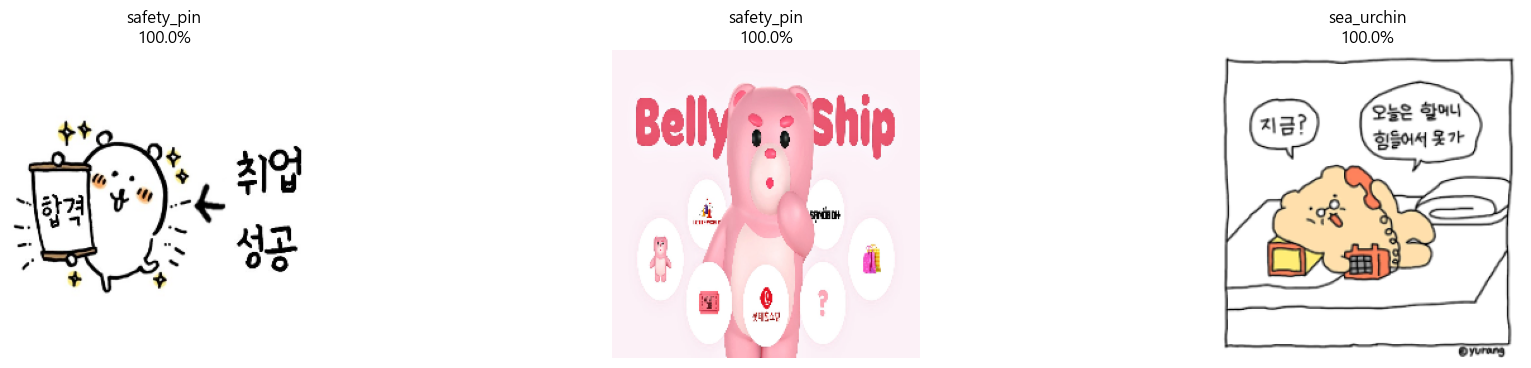

In [28]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

print('xception')
predict_and_display(files_batch, titles, 'xception')

mobilenet
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
[[('n04286575', 'spotlight', 0.15289822), ('n03196217', 'digital_clock', 0.058054216), ('n04074963', 'remote_control', 0.05468842), ('n04243546', 'slot', 0.04789998), ('n04152593', 'screen', 0.046266444)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
[[('n03291819', 'envelope', 0.23425649), ('n06359193', 'web_site', 0.1279025), ('n04243546', 'slot', 0.092639364), ('n03983396', 'pop_bottle', 0.026031649), ('n02834397', 'bib', 0.023244567)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
[[('n03291819', 'envelope', 0.18109433), ('n03938244', 'pillow', 0.14235406), ('n04243546', 'slot', 0.09035554), ('n06359193', 'web_site', 0.03903344), ('n02834397', 'bib', 0.019957416)]]


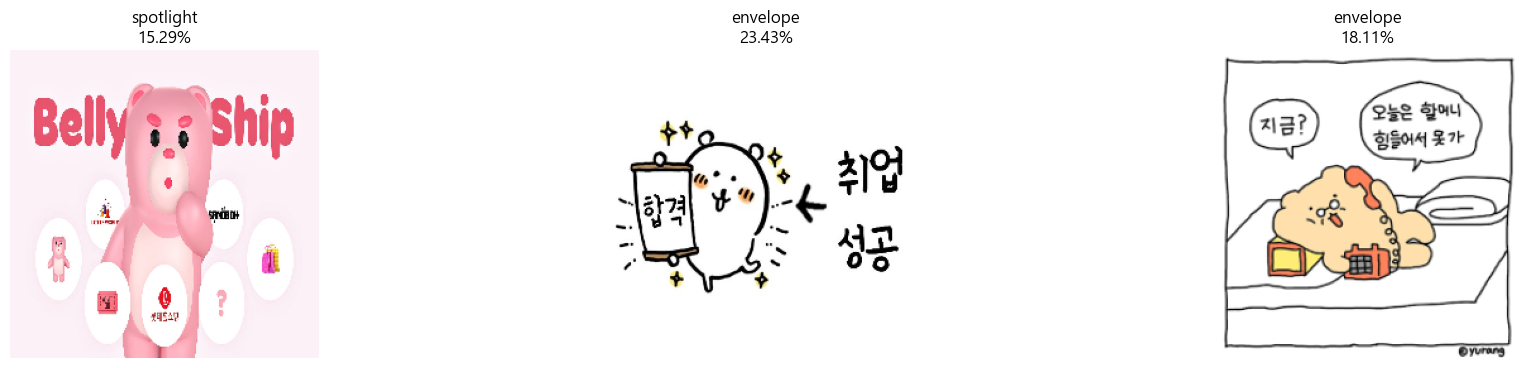

In [29]:
dataset = create_dataset(sampled_file_paths, sampled_targets, BATCH_SIZE, shuffle=True)
files_batch, targets_batch = next(iter(dataset))

print('mobilenet')
predict_and_display(files_batch, titles, 'mobilenet')

In [30]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input
from tensorflow.keras.applications.resnet_v2 import preprocess_input as resnet50v2_preprocess_input
from tensorflow.keras.applications.xception import preprocess_input as xception_preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenetv2_preprocess_input

def create_dataset(paths, targets, BATCH_SIZE, preprocess_input, shuffle=True):
    # VGG16 선택
    if preprocess_input == 'vgg16':
        preprocess_input = vgg_preprocess_input
    # ResNet50V2 선택
    elif preprocess_input == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        preprocess_input = resnet50v2_preprocess_input
    # Xception 선택
    elif preprocess_input == 'xception': # Inception을 기초로 한 모델
        preprocess_input = xception_preprocess_input
    # preprocess_input 선택
    elif preprocess_input == 'mobilenet':
        preprocess_input = mobilenetv2_preprocess_input
        
    return Dataset(paths,
                   targets,
                   batch_size=BATCH_SIZE,
                   preprocess=preprocess_input,
                   shuffle=True)

### 🌟 1Cycle

In [31]:
# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 8

In [32]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2 # 작은 장치에서도 성능을 끌어올릴 수 있는 모델

# 모델 생성 함수 선언
# model_name: 사전 훈련 모델 이름, verbose: 모델 요약 출력 여부
def create_model(model_name='vgg16', verbose=False):
    # Input layer: 이미지 크기와 채널 수를 지정
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    # VGG16 모델 선택
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # ResNet50V2 모델 선택
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # Xception 모델 선택
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # MobileNetV2 모델 선택
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # output layer: 모델 출력 층 
    x = model.output

    # 분류기
    # GlobalAveragePooling2D: 글로벌 평균 풀링 층을 추가하여 특성 맵의 공간 차원 축소
    x = GlobalAveragePooling2D()(x)
    # hidden layer: VGG16 모델 선택을 선택하지 않았다면 dropout 미진행
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # hidden layer: 뉴런과 ReLU 활성화 함수 사용
    x = Dense(50, activation='relu')(x)

    # hidden layer: VGG16 모델 선택을 선택하지 않았다면 dropout 미진행
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # output layer: 3개의 뉴런과 활성화 함수를 사용하여 클래스 확률 출력
    output = Dense(3, activation='softmax', name='output')(x)

    # 모델 생성: 입력과 출력을 지정하여 모델 정의
    model = Model(inputs=input_tensor, outputs=output)

    # verbose가 True인 경우 모델 요약 출력
    if verbose:
        model.summary()
    
    return model

In [33]:
import albumentations as A

# 데이터 경로 및 타겟 담기
train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 이미지 변환 (증강)
aug = A.Compose([
    # 크기 조정 및 회전
    A.ShiftScaleRotate(p=0.5),
    # 센터 크롭
    A.CenterCrop(height=100, width=200, p=0.5),
    # 밝기 및 대비 변경
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

In [34]:
# Dataset class로 객체 생성
train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'mobilenet', shuffle=True)
validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'mobilenet', shuffle=False)
test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'mobilenet', shuffle=False)

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/1cycle/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습률 동적으로 감소
rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=2,
    mode='min'
)

# 일정 기간 동안 성능이 개선되지 않을 시 학습 조기 중단
ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=4,
    mode='min'
)

In [36]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 모델 생성 함수를 사용하여 모델 생성
model = create_model(model_name='mobilenet', verbose=True)

# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

C:\Users\LEGION\AppData\Local\Temp\ipykernel_5632\1980531665.py:26: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 122, 122, 32)      │             864 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 122, 122, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 122, 122, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 122, 122, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 122, 122, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 122, 122, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 122, 122, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 122, 122, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 122, 122, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 122, 122, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 122, 122, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 123, 123, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 61, 61, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,322,187 (8.86 MB)

 Trainable params: 2,288,075 (8.73 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [37]:
import gc 

gc.collect()

29255

In [38]:
# 반복횟수 지정
# 대문자로 상수를 표기하면 다른 부분에서 변경되지 않는다는 것을 의미
N_EPOCHS = 50

# 훈련
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/50


C:\Users\LEGION\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - acc: 0.6024 - loss: 0.9261 - val_acc: 0.6875 - val_loss: 1.6123 - learning_rate: 0.0010
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - acc: 0.8821 - loss: 0.4884 - val_acc: 0.6042 - val_loss: 6.2285 - learning_rate: 0.0010
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - acc: 0.8929 - loss: 0.4772 - val_acc: 0.4792 - val_loss: 4.6471 - learning_rate: 0.0010
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - acc: 0.9122 - loss: 0.4484 - val_acc: 0.7500 - val_loss: 2.2051 - learning_rate: 1.0000e-04
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - acc: 0.9806 - loss: 0.1049 - val_acc: 0.7812 - val_loss: 1.8601 - learning_rate: 1.0000e-04


In [39]:
# 평가
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 571ms/step - acc: 0.7871 - loss: 2.3826


[3.1418282985687256, 0.7083333134651184]

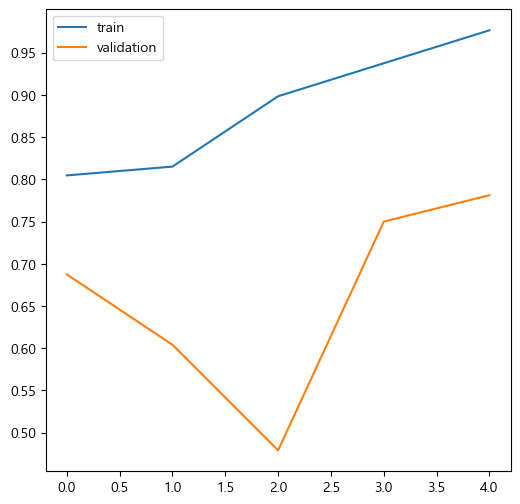

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

### 🌟 2Cycle

In [41]:
# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 8

In [42]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2 # 작은 장치에서도 성능을 끌어올릴 수 있는 모델

# 모델 생성 함수 선언
# model_name: 사전 훈련 모델 이름, verbose: 모델 요약 출력 여부
def create_model(model_name='vgg16', verbose=False):
    # Input layer: 이미지 크기와 채널 수를 지정
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    # VGG16 모델 선택
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # ResNet50V2 모델 선택
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # Xception 모델 선택
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # MobileNetV2 모델 선택
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # output layer: 모델 출력 층 
    x = model.output

    # 분류기
    # GlobalAveragePooling2D: 글로벌 평균 풀링 층을 추가하여 특성 맵의 공간 차원 축소
    x = GlobalAveragePooling2D()(x)
    # hidden layer: VGG16 모델 선택을 선택하지 않았다면 dropout 미진행
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # hidden layer: ReLU 활성화 함수 사용
    x = Dense(50, activation='relu')(x)

    # hidden layer: VGG16 모델 선택을 선택하지 않았다면 dropout 미진행
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # output layer: 3개의 뉴런과 활성화 함수를 사용하여 클래스 확률 출력
    output = Dense(3, activation='softmax', name='output')(x)

    # 모델 생성: 입력과 출력을 지정하여 모델 정의
    model = Model(inputs=input_tensor, outputs=output)

    # verbose가 True인 경우 모델 요약 출력
    if verbose:
        model.summary()
    
    return model

In [43]:
import albumentations as A

# 데이터 경로 및 타겟 담기
train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 이미지 변환 (증강)
aug = A.Compose([
    # 크기 조정 및 회전
    A.ShiftScaleRotate(p=0.5),
    # 센터 크롭
    A.CenterCrop(height=100, width=200, p=0.5),
    # 밝기 및 대비 변경
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

In [44]:
# Dataset class로 객체 생성
train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'resnet50', shuffle=True)
validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'resnet50', shuffle=False)
test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'resnet50', shuffle=False)

In [45]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/2cycle/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

In [46]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 모델 생성 함수를 사용하여 모델 생성
model = create_model(model_name='resnet50', verbose=True)

# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)    │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 250, 250, 3)       │               0 │ input_layer_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 122, 122, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 124, 124, 64)      │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 61, 61, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 61, 61, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 61, 61, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 61, 61, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 61, 61, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 61, 61, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 63, 63, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 61, 61, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 61, 61, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 61, 61, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,667,403 (90.28 MB)

 Trainable params: 23,621,963 (90.11 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [47]:
import gc 

gc.collect()

794

In [48]:
# 반복횟수 지정
# 대문자로 상수를 표기하면 다른 부분에서 변경되지 않는다는 것을 의미
N_EPOCHS = 50

# 훈련
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 563s 6s/step - acc: 0.6865 - loss: 0.7152 - val_acc: 0.3333 - val_loss: 21609.5469 - learning_rate: 0.0010
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 268s 6s/step - acc: 0.8407 - loss: 0.8084 - val_acc: 0.3333 - val_loss: 525.4744 - learning_rate: 0.0010
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 267s 6s/step - acc: 0.9254 - loss: 0.3807 - val_acc: 0.3438 - val_loss: 114.9772 - learning_rate: 0.0010
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 266s 5s/step - acc: 0.8944 - loss: 0.4291 - val_acc: 0.3333 - val_loss: 65845.6484 - learning_rate: 0.0010


In [49]:
# 평가
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - acc: 0.3887 - loss: 57878.0977


[62247.734375, 0.3333333432674408]

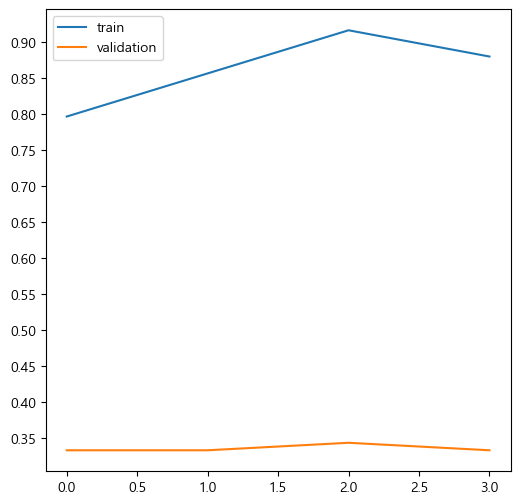

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

### 🌟 3Cycle

In [51]:
# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 8

In [52]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2 # 작은 장치에서도 성능을 끌어올릴 수 있는 모델

# 모델 생성 함수 선언
# model_name: 사전 훈련 모델 이름, verbose: 모델 요약 출력 여부
def create_model(model_name='vgg16', verbose=False):
    # Input layer: 이미지 크기와 채널 수를 지정
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
    # VGG16 모델 선택
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # ResNet50V2 모델 선택
    elif model_name == 'resnet50': # ResNet50, 74.9% ; ResNet50V2, 76.0%
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # Xception 모델 선택
    elif model_name == 'xception': # Inception을 기초로 한 모델
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')
    # MobileNetV2 모델 선택
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # output layer: 모델 출력 층 
    x = model.output

    # 분류기
    # GlobalAveragePooling2D: 글로벌 평균 풀링 층을 추가하여 특성 맵의 공간 차원 축소
    x = GlobalAveragePooling2D()(x)
    # hidden layer: VGG16 모델 선택을 선택하지 않았다면 dropout 미진행
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # hidden layer: 뉴런과 ReLU 활성화 함수 사용
    x = Dense(50, activation='relu')(x)

    # hidden layer: VGG16 모델 선택을 선택하지 않았다면 dropout 미진행
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # output layer: 3개의 뉴런과 활성화 함수를 사용하여 클래스 확률 출력
    output = Dense(3, activation='softmax', name='output')(x)

    # 모델 생성: 입력과 출력을 지정하여 모델 정의
    model = Model(inputs=input_tensor, outputs=output)

    # verbose가 True인 경우 모델 요약 출력
    if verbose:
        model.summary()
    
    return model

In [53]:
import albumentations as A

# 데이터 경로 및 타겟 담기
train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 이미지 변환 (증강)
aug = A.Compose([
    # 크기 조정 및 회전
    A.ShiftScaleRotate(p=0.5),
    # 센터 크롭
    A.CenterCrop(height=100, width=200, p=0.5),
    # 밝기 및 대비 변경
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

In [54]:
# Dataset class로 객체 생성
train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'vgg16', shuffle=True)
validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'vgg16', shuffle=False)
test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'vgg16', shuffle=False)

In [55]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/3cycle/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

In [56]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 모델 생성 함수를 사용하여 모델 생성
model = create_model(model_name='vgg16', verbose=True)

# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 244, 244, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 244, 244, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 244, 244, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 122, 122, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 122, 122, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 122, 122, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 61, 61, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 61, 61, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 61, 61, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 61, 61, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │          25,6

 Total params: 14,740,491 (56.23 MB)

 Trainable params: 14,740,491 (56.23 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
import gc 

gc.collect()

47345

In [58]:
# 반복횟수 지정
# 대문자로 상수를 표기하면 다른 부분에서 변경되지 않는다는 것을 의미
N_EPOCHS = 50

# 훈련
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 702s 14s/step - acc: 0.3041 - loss: 44.2349 - val_acc: 0.3438 - val_loss: 1.1897 - learning_rate: 0.0010
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 664s 14s/step - acc: 0.3484 - loss: 1.1271 - val_acc: 0.3333 - val_loss: 1.0799 - learning_rate: 0.0010
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 681s 14s/step - acc: 0.3852 - loss: 1.0617 - val_acc: 0.5729 - val_loss: 0.9345 - learning_rate: 0.0010
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 661s 14s/step - acc: 0.4617 - loss: 0.9641 - val_acc: 0.4792 - val_loss: 0.8972 - learning_rate: 0.0010
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 665s 14s/step - acc: 0.5196 - loss: 1.0265 - val_acc: 0.5833 - val_loss: 0.8346 - learning_rate: 0.0010
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 660s 14s/step - acc: 0.5416 - loss: 0.8263 - val_acc: 0.5729 - val_loss: 0.6992 - learning_rate: 0.0010
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 664s 14s/step - acc: 0.5873 - loss: 0.7844 - val_acc: 0.5208 - val_loss: 0.8325 - learning_rate: 0.0010
Epoch

In [59]:
# 평가
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

15/15 ━━━━━━━━━━━━━━━━━━━━ 61s 4s/step - acc: 0.7169 - loss: 0.7620


[0.7764638066291809, 0.699999988079071]

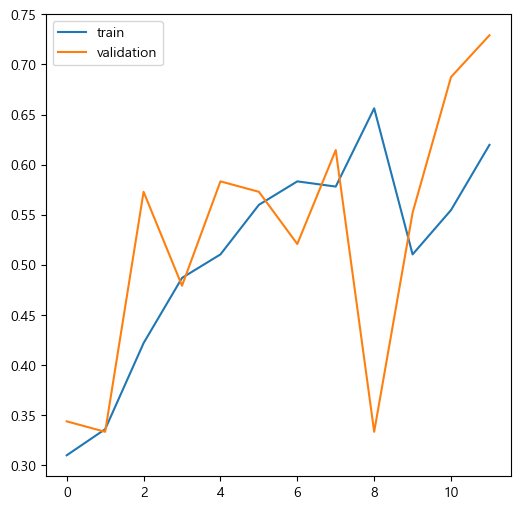

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

### 🌟 4Cycle

In [61]:
# Dataset class로 객체 생성
train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'xception', shuffle=True)
validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'xception', shuffle=False)
test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'xception', shuffle=False)

In [62]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/4cycle/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

In [63]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 모델 생성 함수를 사용하여 모델 생성
model = create_model(model_name='xception', verbose=True)

# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)    │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 121, 121, 32)      │             864 │ input_layer_7[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 121, 121, 32)      │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 121, 121, 32)      │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 119, 119, 64)      │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 119, 119, 64)      │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 119, 119, 64)      │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 119, 119, 128)     │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 119, 119, 128)     │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 119, 119, 128)     │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 119, 119, 128)     │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 119, 119, 128)     │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 60, 60, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 60, 60, 128)       │               

 Total params: 20,964,083 (79.97 MB)

 Trainable params: 20,909,555 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [64]:
import gc 

gc.collect()

42956

In [65]:
# 반복횟수 지정
# 대문자로 상수를 표기하면 다른 부분에서 변경되지 않는다는 것을 의미
N_EPOCHS = 50

# 훈련
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS, 
                    validation_data=validation_dataset,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 608s 8s/step - acc: 0.7316 - loss: 0.6940 - val_acc: 0.8646 - val_loss: 0.8285 - learning_rate: 0.0010
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 353s 7s/step - acc: 0.8987 - loss: 0.4638 - val_acc: 0.5000 - val_loss: 20.9918 - learning_rate: 0.0010
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 351s 7s/step - acc: 0.9204 - loss: 0.4445 - val_acc: 0.9688 - val_loss: 0.3952 - learning_rate: 0.0010
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 353s 7s/step - acc: 0.9099 - loss: 0.3806 - val_acc: 0.9375 - val_loss: 0.6366 - learning_rate: 0.0010
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 350s 7s/step - acc: 0.9151 - loss: 0.3420 - val_acc: 0.8750 - val_loss: 0.4845 - learning_rate: 0.0010
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 352s 7s/step - acc: 0.9215 - loss: 0.3406 - val_acc: 1.0000 - val_loss: 0.0263 - learning_rate: 1.0000e-04
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 351s 7s/step - acc: 0.9771 - loss: 0.0909 - val_acc: 1.0000 - val_loss: 0.0211 - learning_rate: 1.0000e-04
Epoc

In [66]:
# 평가
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - acc: 1.0000 - loss: 0.0182


[0.020490087568759918, 1.0]

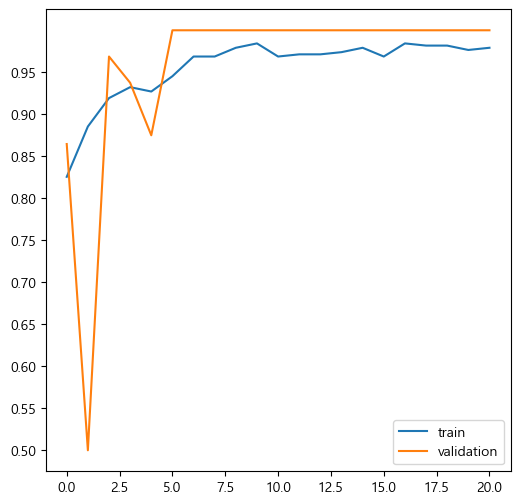

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

### 🌟 5ycle

In [90]:
# 이미지 사이즈 및 배치 사이즈
IMAGE_SIZE = 244
BATCH_SIZE = 8

In [91]:
import albumentations as A

# 데이터 경로 및 타겟 담기
train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values # CategoricalCrossEntropy

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values # CategoricalCrossEntropy

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values # CategoricalCrossEntropy

# 이미지 변환 (증강)
aug = A.Compose([
    # 크기 조정 및 회전
    A.ShiftScaleRotate(p=0.5),
    # 센터 크롭
    A.CenterCrop(height=100, width=200, p=0.5),
    # 밝기 및 대비 변경
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
])

In [92]:
# Dataset class로 객체 생성
train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'xception', shuffle=True)
validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'xception', shuffle=False)
test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'xception', shuffle=False)

In [93]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# weights 저장
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/5cycle/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

In [94]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 모델 생성 함수를 사용하여 모델 생성
model = create_model(model_name='xception', verbose=True)

# 모델 컴파일: 학습 프로세스 설정
# optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)   │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 121, 121, 32)      │             864 │ input_layer_11[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 121, 121, 32)      │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 121, 121, 32)      │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 119, 119, 64)      │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 119, 119, 64)      │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 119, 119, 64)      │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 119, 119, 128)     │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 119, 119, 128)     │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 119, 119, 128)     │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 119, 119, 128)     │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 119, 119, 128)     │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_16 (Conv2D)            │ (None, 60, 60, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 60, 60, 128)       │               

 Total params: 20,964,083 (79.97 MB)

 Trainable params: 20,909,555 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [95]:
# freeze 확인하기
for i, layer in enumerate(model.layers[:-5]):
    layer.trainable = False
    print(i + 1, '.', layer.name, 'trainable:', layer.trainable)

print('\n######### classifier layers ######### ')
for layer in model.layers[-5:]:
    print(layer.name, 'trainable:', layer.trainable)

1 . input_layer_11 trainable: False
2 . block1_conv1 trainable: False
3 . block1_conv1_bn trainable: False
4 . block1_conv1_act trainable: False
5 . block1_conv2 trainable: False
6 . block1_conv2_bn trainable: False
7 . block1_conv2_act trainable: False
8 . block2_sepconv1 trainable: False
9 . block2_sepconv1_bn trainable: False
10 . block2_sepconv2_act trainable: False
11 . block2_sepconv2 trainable: False
12 . block2_sepconv2_bn trainable: False
13 . conv2d_16 trainable: False
14 . block2_pool trainable: False
15 . batch_normalization_16 trainable: False
16 . add_48 trainable: False
17 . block3_sepconv1_act trainable: False
18 . block3_sepconv1 trainable: False
19 . block3_sepconv1_bn trainable: False
20 . block3_sepconv2_act trainable: False
21 . block3_sepconv2 trainable: False
22 . block3_sepconv2_bn trainable: False
23 . conv2d_17 trainable: False
24 . block3_pool trainable: False
25 . batch_normalization_17 trainable: False
26 . add_49 trainable: False
27 . block4_sepconv1_act t

In [96]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras import layers
import albumentations as A

# fine tuning 함수 선언
def fine_tune(datas, model_name, aug):
    # 반복 횟수
    FIRST_EPOCHS = 50
    SECOND_EPOCHS = 50

    # Unpacking (데이터 분리)
    train_file_paths, train_targets, \
    validation_file_paths, validation_targets, \
    test_file_paths, test_targets = datas

    # Dataset class로 객체 생성
    train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'xception', shuffle=True)
    validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'xception', shuffle=False)
    test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'xception', shuffle=False)
  
    # 모델 생성 함수를 사용하여 모델 생성
    model = create_model(model_name='xception', verbose=True)
    
    # 모델 컴파일: 학습 프로세스 설정
    # optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
    model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

    # feature extractor layer들을 전부 freeze (분류기 빼고 모두 freeze)
    for layer in model.layers[:-5]:
        layer.trainable = False

    # 1차 훈련
    history = model.fit(train_dataset,
                        batch_size=BATCH_SIZE,
                        epochs=FIRST_EPOCHS, 
                        validation_data=validation_dataset,
                        callbacks=[mcp_cb, rlr_cb, ely_cb])

    # 배치 정규화(BatchNormalization)만 freeze 진행
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    # 부분 freeze 진행
    for layer in model.layers[:27]:
        layer.trainable = False

    # 모델 컴파일: 학습 프로세스 설정
    # optimizer: 최적화 알고리즘, loss: 손실함수, metrics: 성능지표
    model.compile(optimizer=Adam(0.00001), loss=CategoricalCrossentropy(), metrics=['acc'])

    # 2차 훈련
    history = model.fit(train_dataset,
                        batch_size=BATCH_SIZE,
                        epochs=SECOND_EPOCHS,
                        validation_data=validation_dataset, 
                        callbacks=[mcp_cb, rlr_cb, ely_cb])
    
    return model, history

In [97]:
import gc 

gc.collect()

88547

In [98]:
# fine tuning 함수 호출하여 미세 조정 진행
model, history = fine_tune((train_file_paths, train_targets,
                            validation_file_paths, validation_targets,
                            test_file_paths, test_targets),
                           'xception',
                           aug)

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)   │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 121, 121, 32)      │             864 │ input_layer_12[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 121, 121, 32)      │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 121, 121, 32)      │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 119, 119, 64)      │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 119, 119, 64)      │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 119, 119, 64)      │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 119, 119, 128)     │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 119, 119, 128)     │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 119, 119, 128)     │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 119, 119, 128)     │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 119, 119, 128)     │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_20 (Conv2D)            │ (None, 60, 60, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 60, 60, 128)       │               

 Total params: 20,964,083 (79.97 MB)

 Trainable params: 20,909,555 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

Epoch 1/50


C:\Users\LEGION\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 174s 3s/step - acc: 0.6019 - loss: 0.9054 - val_acc: 0.8333 - val_loss: 0.4174 - learning_rate: 0.0010
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - acc: 0.7886 - loss: 0.4984 - val_acc: 0.9062 - val_loss: 0.2714 - learning_rate: 0.0010
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - acc: 0.9229 - loss: 0.2556 - val_acc: 0.9375 - val_loss: 0.1896 - learning_rate: 0.0010
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - acc: 0.9252 - loss: 0.2178 - val_acc: 0.9583 - val_loss: 0.1651 - learning_rate: 0.0010
Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 376s 6s/step - acc: 0.9560 - loss: 0.1477 - val_acc: 0.9688 - val_loss: 0.0659 - learning_rate: 1.0000e-05
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 261s 5s/step - acc: 0.9848 - loss: 0.0595 - val_acc: 0.9583 - val_loss: 0.0758 - learning_rate: 1.0000e-05
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 261s 5s/step - acc: 0.9969 - loss: 0.0380 - val_acc: 0.9792 - val_loss: 0.0457 - learning_rate: 1.0000e-05
Epoch 4/50
4

In [99]:
# 평가
model.evaluate(test_dataset, batch_size=BATCH_SIZE)

15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - acc: 0.9098 - loss: 0.3030


[0.15832391381263733, 0.9416666626930237]

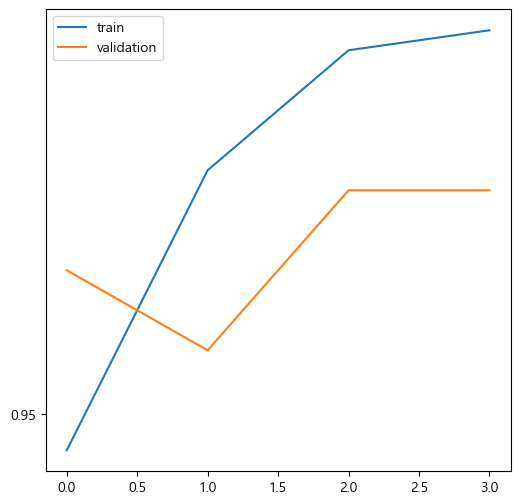

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# 학습과정 지표를 그래프화
def show_history(history):
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    
show_history(history)

### 🌟 결과

In [101]:
data = {
    'model': ['mobilenet', 'resnet50', 'vgg16', 'xception', '미세조정'],
    'acc': [0.9806, 0.8944, 0.6198, 0.9818, 1.0000],
    'val_acc': [0.7812, 0.3333, 0.7292, 1.0000, 0.9792],
}

results_df = pd.DataFrame(data)

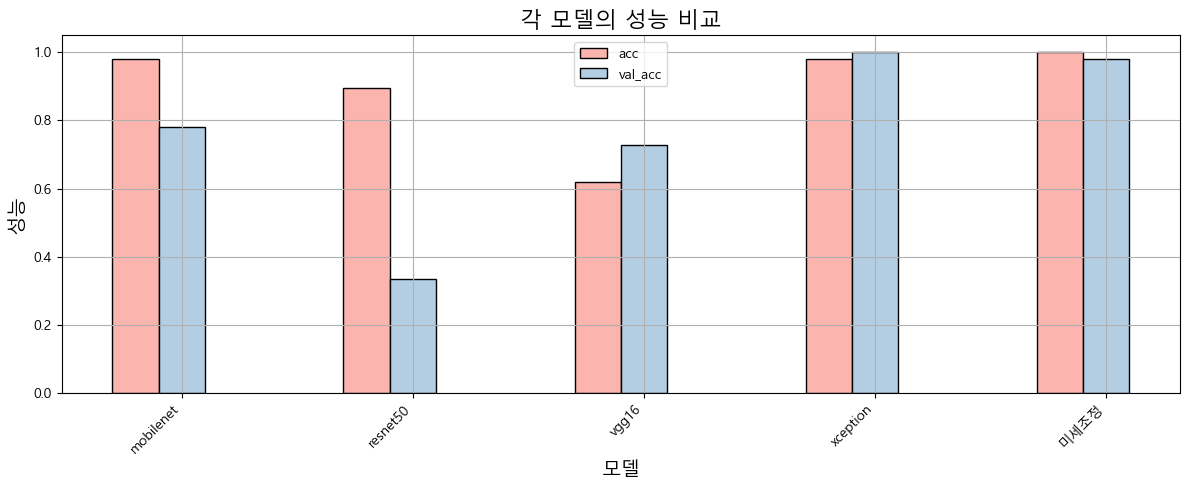

In [107]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 프레임에서 각 모델명과 해당 지표들을 추출합니다.
models = results_df['model']
accuracy = results_df['acc']
val_accuracy = results_df['val_acc']

# 그래프를 그립니다.
bar_width = 0.2
index = np.arange(len(models))

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')

plt.figure(figsize=(12, 5))

plt.bar(index, accuracy, color=cmap(np.array([0])), width=bar_width, label='acc', edgecolor='black')
plt.bar(index + bar_width, val_accuracy, color=cmap(np.array([1])), width=bar_width, label='val_acc', edgecolor='black')

plt.title('각 모델의 성능 비교', fontsize=16)
plt.xlabel('모델', fontsize=14)
plt.ylabel('성능', fontsize=14)
plt.xticks(index + bar_width, models, rotation=45, ha='right')
plt.legend()
plt.grid(True)

# # y축의 범위 지정
# plt.ylim(0.7, 1.02)

plt.tight_layout()
plt.show()

In [108]:
# Dataset class로 객체 생성
train_dataset = create_dataset(train_file_paths, train_targets, BATCH_SIZE, 'xception', shuffle=True)
validation_dataset = create_dataset(validation_file_paths, validation_targets, BATCH_SIZE, 'xception', shuffle=False)
test_dataset = create_dataset(test_file_paths, test_targets, BATCH_SIZE, 'xception', shuffle=False)

In [109]:
import matplotlib.pyplot as plt
# 이미지 출력 함수 선언
def show_image(image):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')

In [110]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

model = create_model(model_name='xception', verbose=True)
model.load_weights('./callback_files/weights.004-0.0560-1.0000.weights.h5')
model.compile(optimizer=Adam(0.00001), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)   │ (None, 244, 244, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 121, 121, 32)      │             864 │ input_layer_13[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 121, 121, 32)      │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 121, 121, 32)      │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 119, 119, 64)      │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 119, 119, 64)      │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 119, 119, 64)      │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 119, 119, 128)     │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 119, 119, 128)     │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 119, 119, 128)     │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 119, 119, 128)     │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 119, 119, 128)     │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_24 (Conv2D)            │ (None, 60, 60, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 60, 60, 128)       │               

 Total params: 20,964,083 (79.97 MB)

 Trainable params: 20,909,555 (79.76 MB)

 Non-trainable params: 54,528 (213.00 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 852ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 862ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step


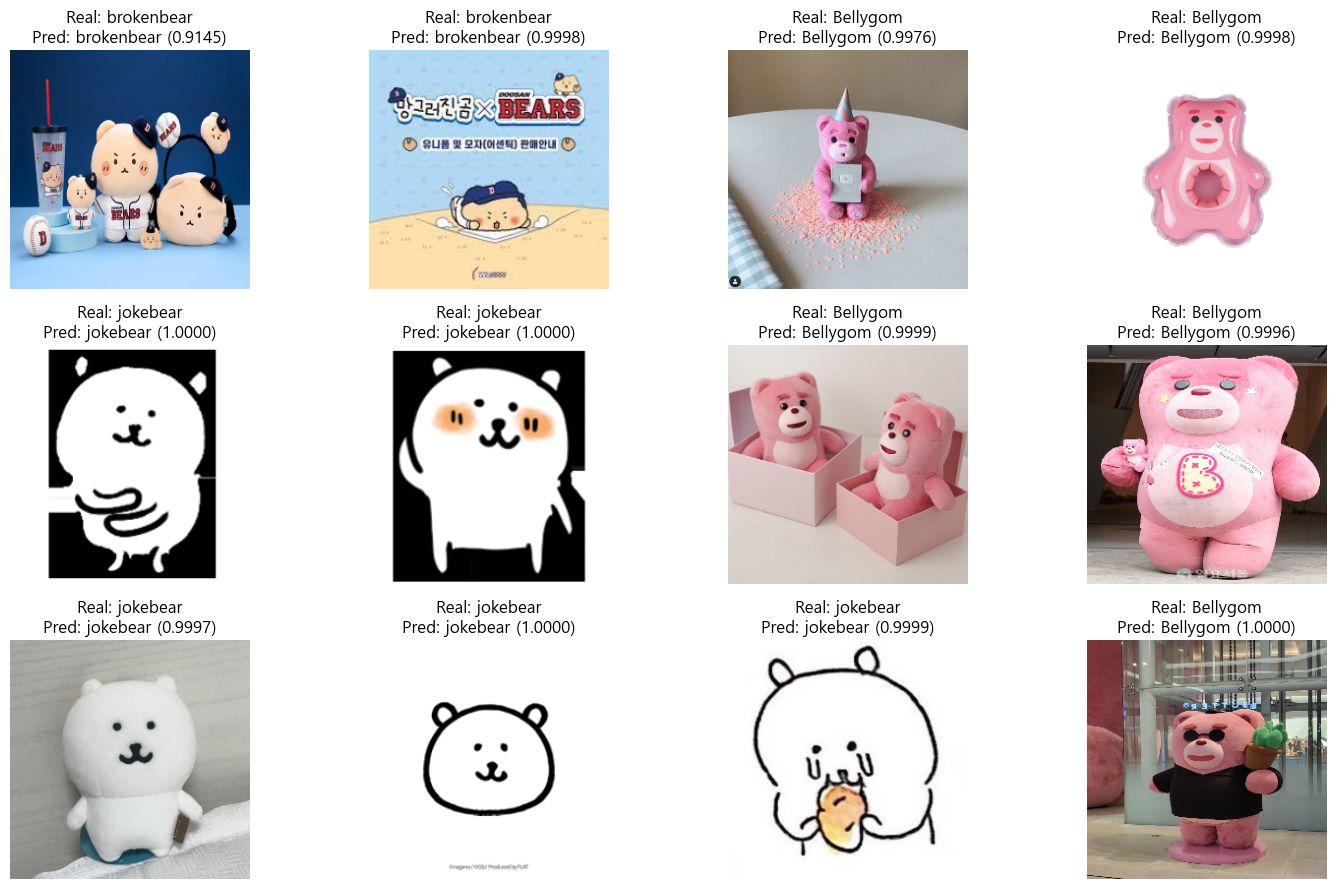

In [111]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

# 클래스 이름 지정
class_names = ['Bellygom', 'brokenbear', 'jokebear']

# 선택할 이미지의 시작 인덱스와 끝 인덱스 지정
start_index = 10
end_index = 22

# 행과 열의 개수 지정
num_rows = (end_index - start_index + 3) // 4  # +3 ensures rounding up
num_cols = 4

# 서브플롯 설정
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# 시작부터 끝 인덱스까지의 이미지들을 처리
for idx, i in enumerate(range(start_index, end_index)):
    # 이미지 파일 경로 선택
    selected_file_path = train_file_paths[i]

    # 이미지 로드 및 전처리
    image = cv2.cvtColor(cv2.imread(selected_file_path), cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (244, 244))
    processed_image = mobilenet_preprocess_input(image.copy())

    # 모델 예측
    predicted_probabilities = model.predict(np.expand_dims(processed_image, axis=0))

    # 예측된 클래스 및 확률 출력
    predicted_class_index = np.argmax(predicted_probabilities)
    predicted_class_name = class_names[predicted_class_index]
    predicted_probability = predicted_probabilities[0][predicted_class_index]

    # 실제 클래스 정보 가져오기
    real_class_index = np.where(train_targets[i])[0][0]  # True 값의 인덱스 가져오기
    real_class_name = class_names[real_class_index]

    # 서브플롯에 이미지와 텍스트 출력
    ax = axs[idx // num_cols, idx % num_cols]
    ax.imshow(image)
    ax.set_title(f"Real: {real_class_name}\nPred: {predicted_class_name} ({predicted_probability:.4f})")
    ax.axis('off')

# 남은 서브플롯을 비활성화
for j in range(idx + 1, num_rows * num_cols):
    axs[j // num_cols, j % num_cols].axis('off')

plt.tight_layout()
plt.show()
